 <div style='text-align: center;'>
   <font size = "5">
      Logistic Regression (sklearn)  
   </font>
</div>


<div style='text-align:justify;'>
The notebook uses Logistic regression model from the scikit-learn library. The dataset used for the classification task is cited from [1]. For our tutorial scope, we have only used the red wine quality data. 
    

This is just an introduction to the basic implementation of Logistic regression model in Python. If needed, it can be used to further extend the model for learning purposes.
    
   
[1] Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. 
    
You can download the dataset from here https://doi.org/10.24432/C56S3T

</div>

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing 
import seaborn as sns # data visualization
from sklearn.linear_model import LogisticRegression #LR model
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
wine=pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine['fixed acidity']

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64

In [6]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

## Data pre-processing

In [7]:
#setting the wine quality between 1 and 0, if wine quality is >=7 is good which means 1
wine['good_quality'] = [1 if x >= 7 else 0 for x in wine['quality']]
wine.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1569            6.2             0.510         0.14             1.9      0.056   
443            10.0             0.440         0.49             2.7      0.077   
2               7.8             0.760         0.04             2.3      0.092   
1542            6.7             0.855         0.02             1.9      0.064   
1263            8.2             0.780         0.00             2.2      0.089   
910             9.3             0.380         0.48             3.8      0.132   
543            11.2             0.660         0.24             2.5      0.085   
1072            7.2             0.350         0.26             1.8      0.083   
800             7.2             0.610         0.08             4.0      0.082   
1175            6.5             0.610         0.00             2.2      0.095   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1569                 15.0                  34.0  0.99396  3.48       0.57   
443                  11.0                  19.0  0.99630  3.23       0.63   
2                    15.0                  54.0  0.99700  3.26       0.65   
1542                 29.0                  38.0  0.99472  3.30       0.56   
1263                 13.0                  26.0  0.99780  3.37       0.46   
910                   3.0                  11.0  0.99577  3.23       0.57   
543                  16.0                  53.0  0.99930  3.06       0.72   
1072                 33.0                  75.0  0.99680  3.40       0.58   
800                  26.0                 108.0  0.99641  3.25       0.51   
1175                 48.0                  59.0  0.99541  3.61       0.70   

      alcohol  quality  good_quality  
1569    11.50        6             0  
443     11.60        7             1  
2        9.80        5             0  
1542    10.75        6             0  
1263     9.60        4             0  
910     13.20        6             0  
543     11.00        6             0  
1072     9.50        6             0  
800      9.40        5             0  
1175    11.50        6             0

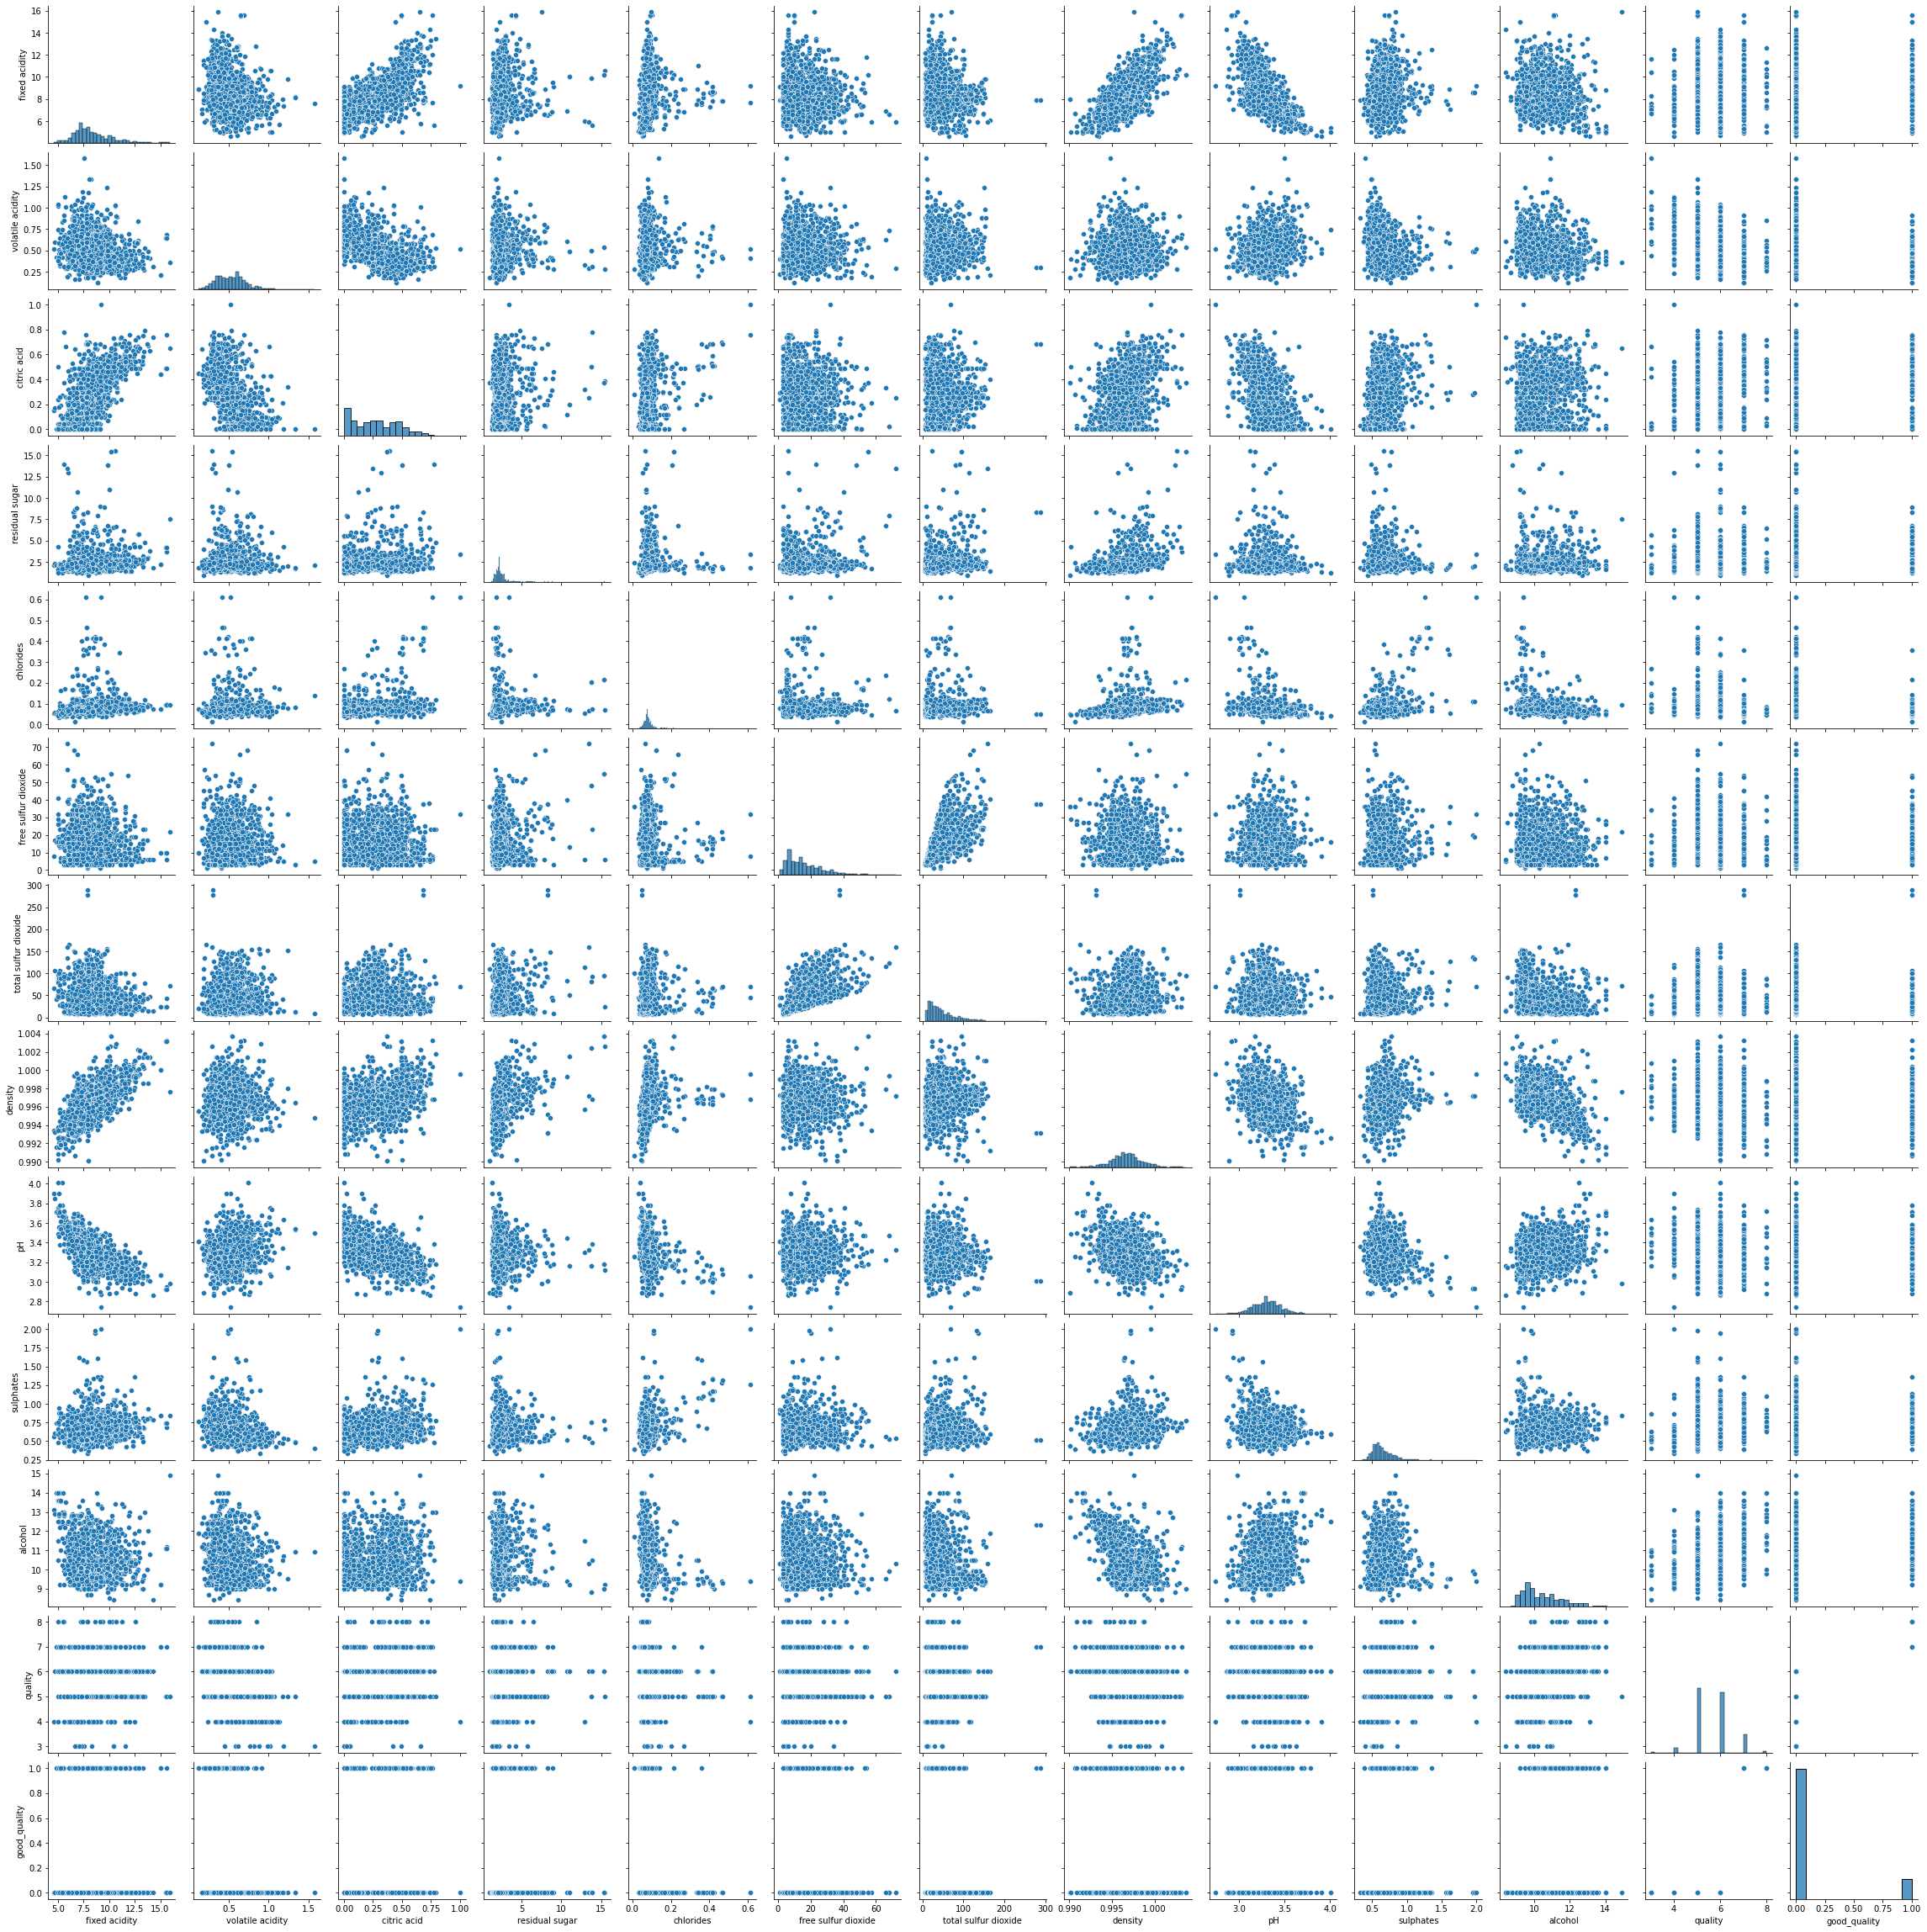

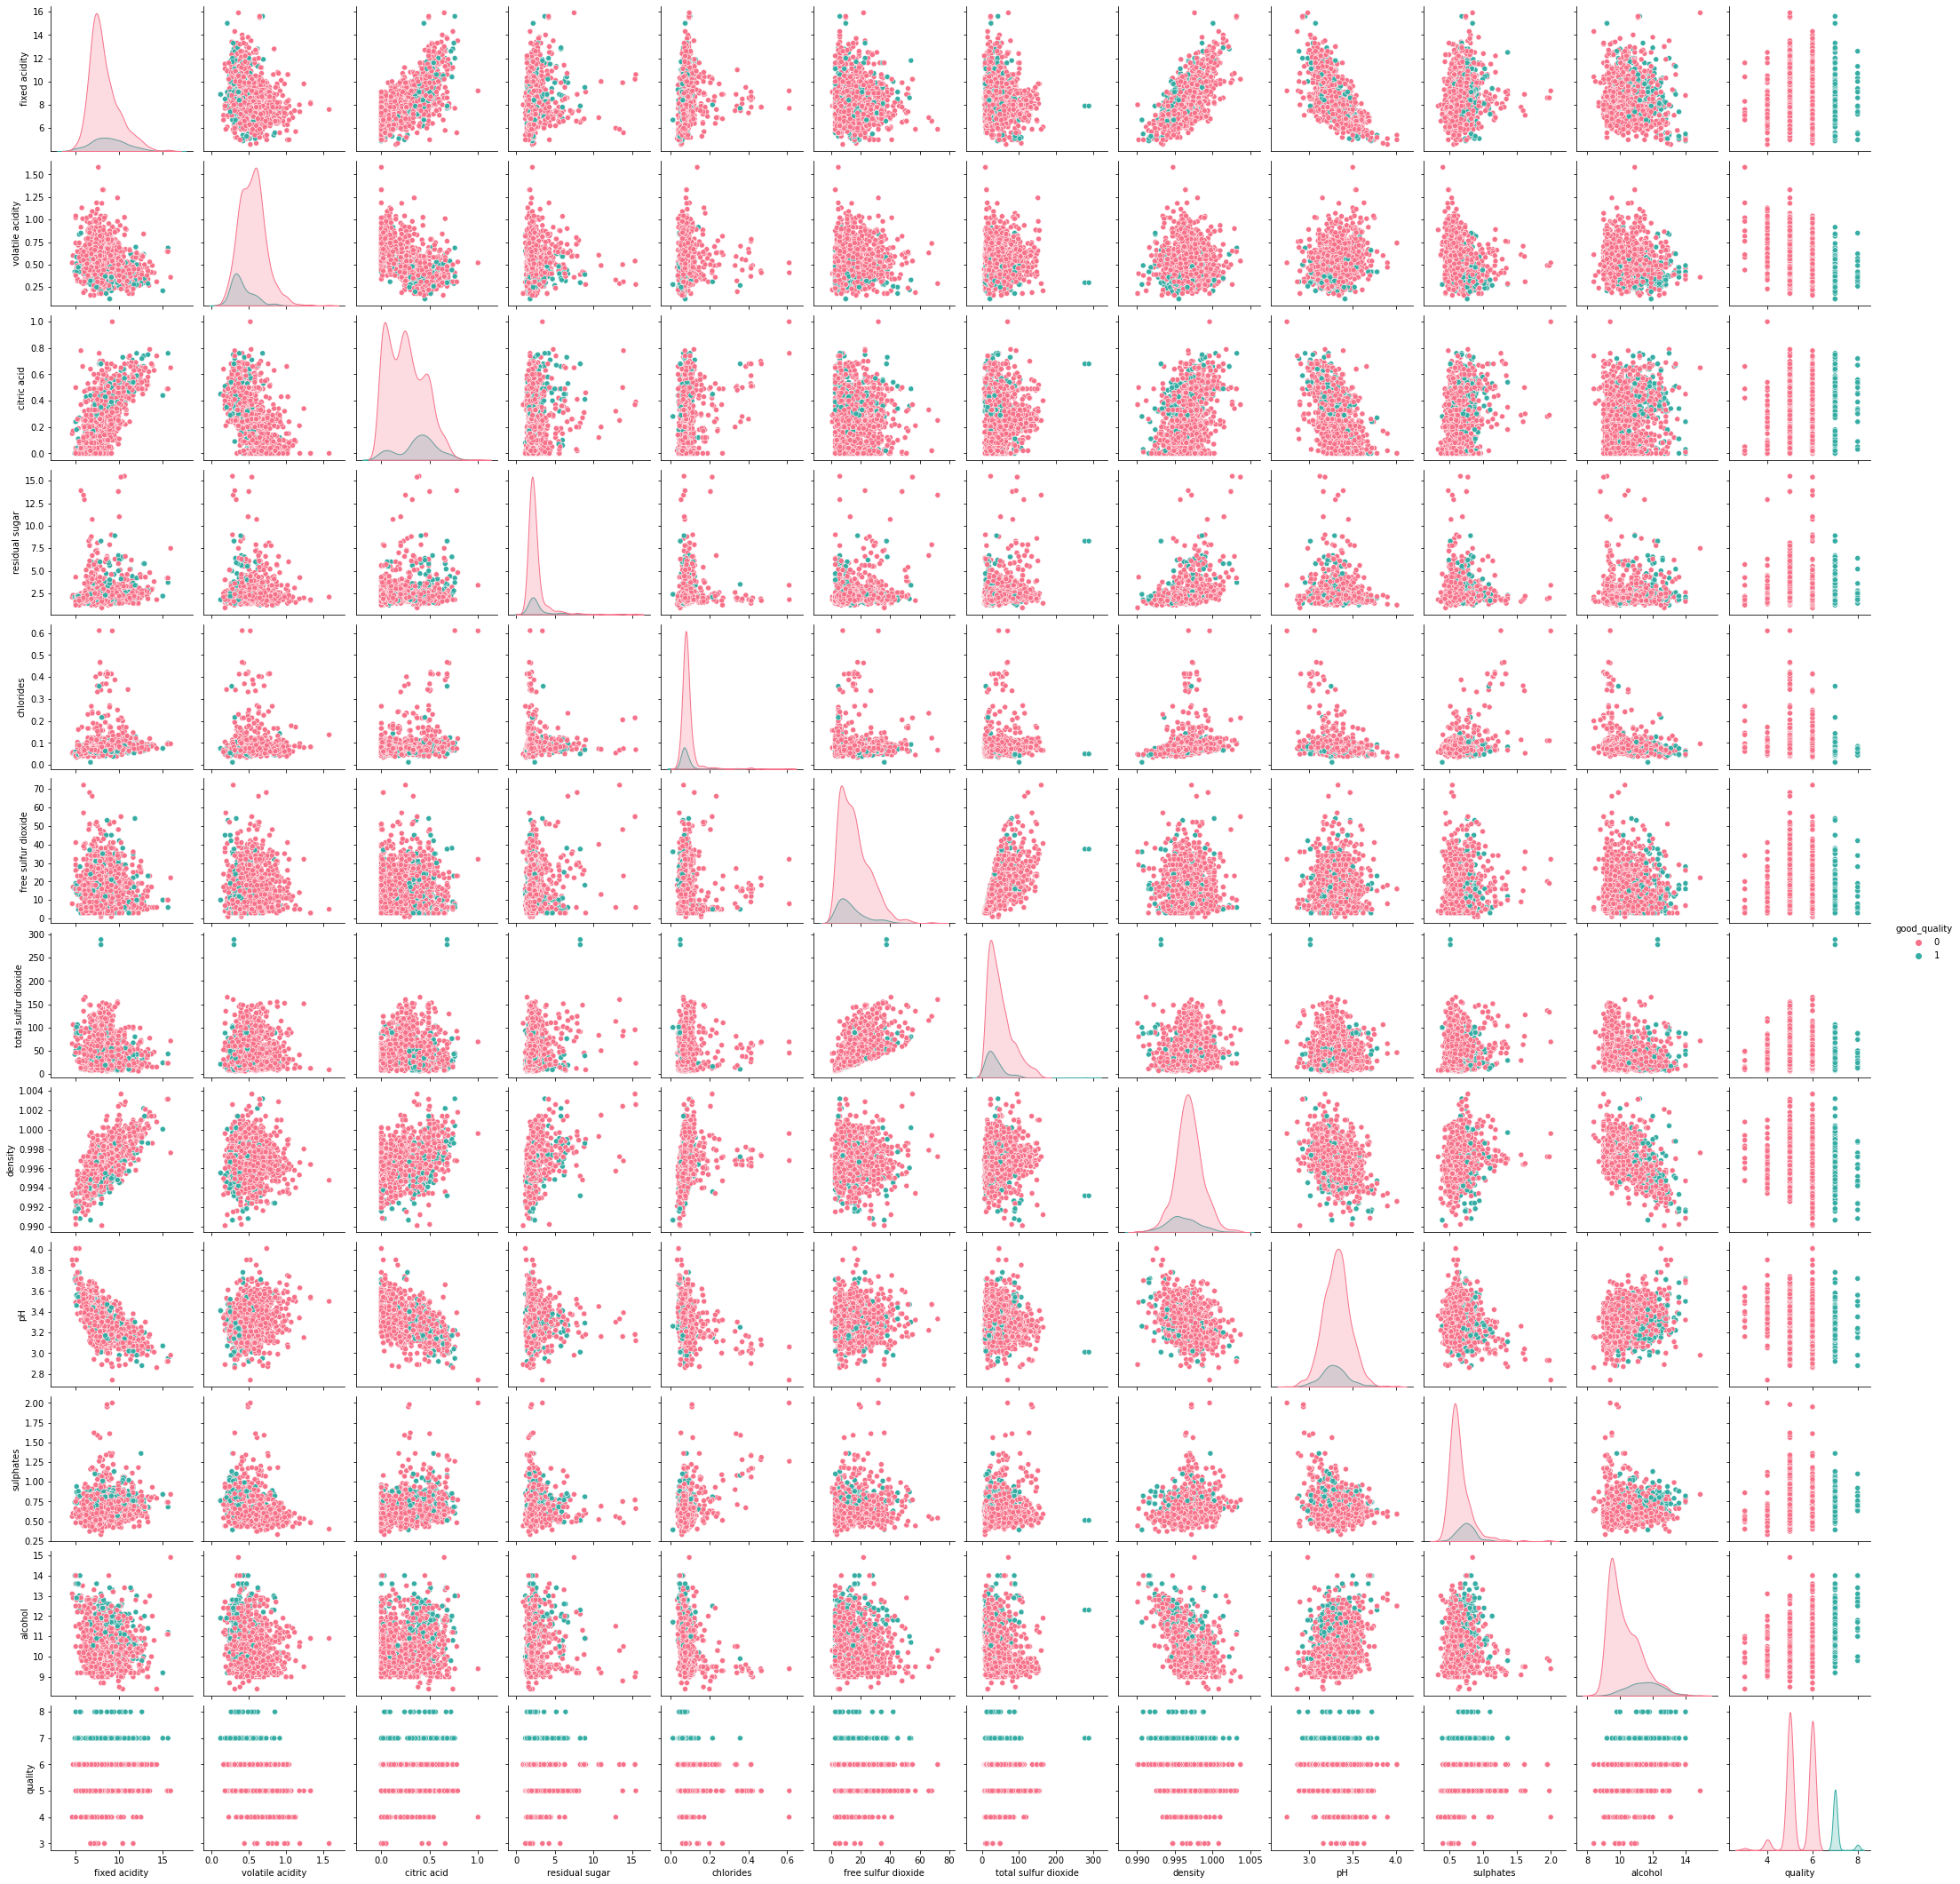

In [8]:
# Plot pairwise relationships
plot = sns.pairplot(wine,palette="husl")  
plot = sns.pairplot(wine,hue = "good_quality",palette="husl")

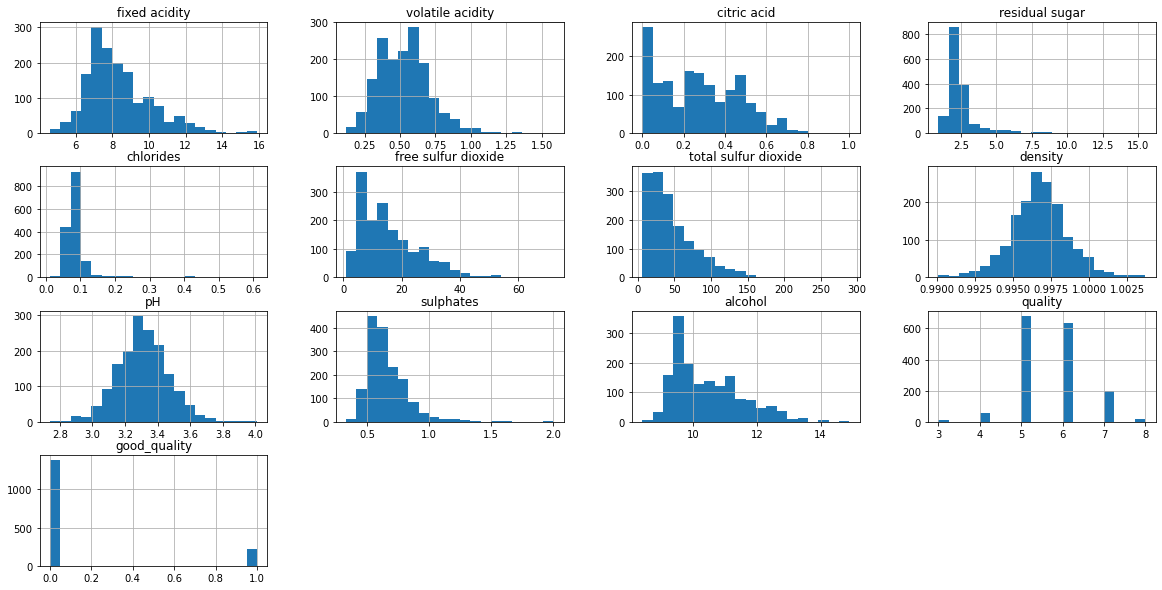

In [9]:
import matplotlib.pyplot as plt
wine.hist(bins=20, figsize=(20, 10)) #bins =40
plt.show()

In [10]:
wine.groupby('good_quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
good_quality                                                                 
0                  8.236831          0.547022     0.254407        2.512120   
1                  8.847005          0.405530     0.376498        2.708756   

              chlorides  free sulfur dioxide  total sulfur dioxide   density  \
good_quality                                                                   
0              0.089281            16.172214             48.285818  0.996859   
1              0.075912            13.981567             34.889401  0.996030   

                    pH  sulphates    alcohol   quality  
good_quality                                            
0             3.314616   0.644754  10.251037  5.408828  
1             3.288802   0.743456  11.518049  7.082949

## Preparing the dataset

In [11]:
X = wine.copy()
y = X['good_quality'] 
X = X.drop(['quality','good_quality'], axis =1)

In [12]:
#total number of good wines
y.value_counts()

0    1382
1     217
Name: good_quality, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Logistic Regression model

In [14]:
model = LogisticRegression(max_iter=2000, verbose=1)
# fitting the model with data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [15]:
# see the classification results
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,y_pred))
# Other metrics include precision, recall, F1 score

Accuracy: 0.8791666666666667


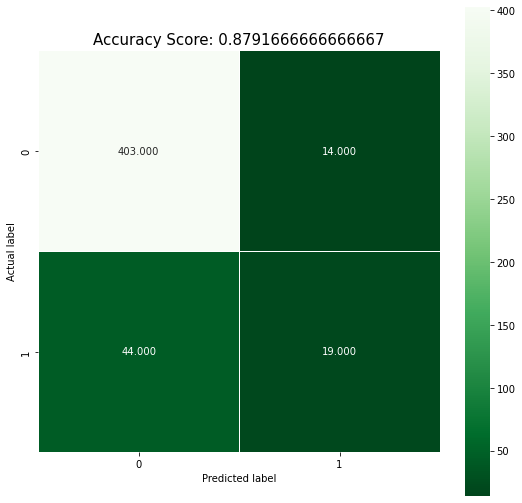

In [16]:
# Confusion Matrix 
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
# print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);

## Further Improvements

### 1) Removing the suspected outliers

In [17]:
# Data plotting
import plotly.graph_objs as go
import plotly.offline as py

In [18]:
def OutliersBox(df, feature_name):
    trace0 = go.Box(y = df[feature_name], name='AllPoints', jitter=0.3, pointpos=-1.8, boxpoints='all')
    trace1 = go.Box(y = df[feature_name], name='Suspected Outliers', boxpoints='suspectedoutliers')
    layout = go.Layout(title = "{} Outliers".format(feature_name))
    data = [trace0,trace1]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig,filename="Outliers")

In [19]:
OutliersBox(wine, wine.columns[0])

In [20]:
def TukeyOutliers(data, feature_name, drop=False):
    data_array = data[feature_name]
    Q1 = np.percentile(data_array, 25)
    Q3 = np.percentile(data_array, 75)
#   step = 1.5*(Q3-Q1)  # Standard scale
    step = 3.0*(Q3-Q1)
    
    outlier_indices = data_array[~((data_array>=Q1-step)&(data_array<=Q3+step))].index.tolist()
    outlier_values = data_array[~((data_array>=Q1-step)&(data_array<=Q3+step))].values
    
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outlier_indices), outlier_values))
    
    if drop:
        good_data = data.drop(data.index[outlier_indices]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))     
        return good_data
               
    else: 
        print ("Nothing happens, df.shape = ",data.shape)
        return data

In [21]:
wine_clean = TukeyOutliers(wine,wine.columns[0],drop=True)
OutliersBox(wine_clean, wine.columns[0])

wine_clean = TukeyOutliers(wine_clean,wine.columns[1],drop=True)
OutliersBox(wine_clean, wine.columns[1])

wine_clean = TukeyOutliers(wine_clean,wine.columns[2],drop=True)
OutliersBox(wine_clean, wine.columns[2])

wine_clean = TukeyOutliers(wine_clean,wine.columns[3],drop=True)
OutliersBox(wine_clean, wine.columns[3])

wine_clean = TukeyOutliers(wine_clean,wine.columns[4],drop=True)
OutliersBox(wine_clean, wine.columns[4])

wine_clean = TukeyOutliers(wine_clean,wine.columns[5],drop=True)
OutliersBox(wine_clean, wine.columns[5])

wine_clean = TukeyOutliers(wine_clean,wine.columns[6],drop=True)
OutliersBox(wine_clean, wine.columns[6])

wine_clean = TukeyOutliers(wine_clean,wine.columns[7],drop=True)
OutliersBox(wine_clean, wine.columns[7])

wine_clean = TukeyOutliers(wine_clean,wine.columns[8],drop=True)
OutliersBox(wine_clean, wine.columns[8])

wine_clean = TukeyOutliers(wine_clean,wine.columns[9],drop=True)
OutliersBox(wine_clean, wine.columns[9])

wine_clean = TukeyOutliers(wine_clean,wine.columns[10],drop=True)
OutliersBox(wine_clean, wine.columns[10])


Number of outliers (inc duplicates): 5 and outliers: [15.6 15.5 15.5 15.6 15.9]
New dataset with removed outliers has 1594 samples with 13 features each.


Number of outliers (inc duplicates): 1 and outliers: [1.58]
New dataset with removed outliers has 1593 samples with 13 features each.


Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 1593 samples with 13 features each.


Number of outliers (inc duplicates): 87 and outliers: [ 6.1   6.1  10.7   5.5   5.9   5.9   5.1   5.5   5.5   5.5   5.5   7.3
  7.2   5.6   7.    6.4   5.6   5.6  11.   11.    4.8   5.8   5.8   6.2
  7.9   7.9   6.7   6.6   5.2  15.5   8.3   6.55  6.55  6.1   5.8   5.15
  6.3   7.9   5.1   5.6   5.6   6.    8.6   6.    6.6   6.    6.    9.
  8.8   8.8   5.    5.9   6.2   8.9   8.1   8.1   6.4   6.4   8.3   8.3
  5.5   5.5   5.5   6.2   5.6   7.8   5.8  12.9  13.4   4.8   6.3   5.4
  6.1   5.1   5.1  15.4  15.4   4.8   5.2   5.2  13.8  13.8   5.7   6.7
 13.9   5.1   7.8 ]
New dataset with removed outliers has 1506 samples with 13 features each.


Number of outliers (inc duplicates): 61 and outliers: [0.176 0.17  0.368 0.341 0.172 0.332 0.464 0.401 0.467 0.178 0.236 0.61
 0.36  0.27  0.337 0.263 0.611 0.358 0.343 0.186 0.213 0.214 0.159 0.174
 0.413 0.152 0.152 0.2   0.171 0.226 0.226 0.25  0.222 0.157 0.422 0.387
 0.415 0.157 0.157 0.243 0.241 0.19  0.165 0.194 0.161 0.414 0.216 0.171
 0.178 0.369 0.166 0.166 0.403 0.414 0.166 0.415 0.153 0.415 0.267 0.169
 0.23 ]
New dataset with removed outliers has 1445 samples with 13 features each.


Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 1445 samples with 13 features each.


Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 1445 samples with 13 features each.


Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 1445 samples with 13 features each.


Number of outliers (inc duplicates): 2 and outliers: [4.01 4.01]
New dataset with removed outliers has 1443 samples with 13 features each.


Number of outliers (inc duplicates): 8 and outliers: [1.56 1.95 1.95 1.98 1.36 1.36 1.36 1.62]
New dataset with removed outliers has 1435 samples with 13 features each.


Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 1435 samples with 13 features each.


In [22]:
X = wine_clean.copy()
y = X['good_quality'] 
X = X.drop(['quality','good_quality'], axis =1 )

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)#changing max iter vlaue to avoid error
# fitting the model with data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
# see the classification results
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.888631090487239

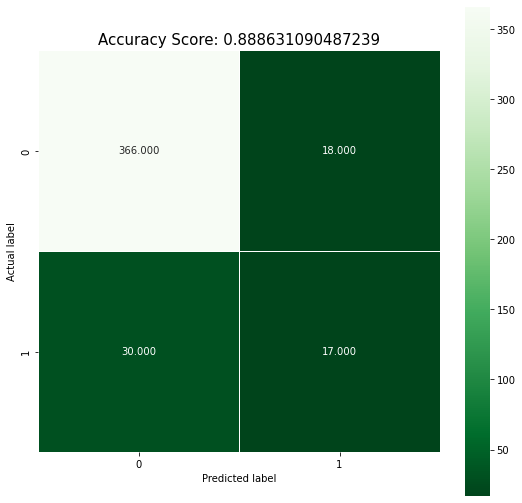

In [26]:
# Confusion Matrix 
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);

### 2) Data Normalization

In [27]:
from sklearn.preprocessing import MinMaxScaler
# Normalization
scaler_minmax = MinMaxScaler()
X_norm = scaler_minmax.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)

In [28]:
X_norm.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.269231          0.479339     0.000000        0.263158   0.474074   
1       0.307692          0.628099     0.000000        0.447368   0.637037   
2       0.307692          0.528926     0.052632        0.368421   0.592593   
3       0.634615          0.132231     0.736842        0.263158   0.466667   
4       0.269231          0.479339     0.000000        0.263158   0.474074   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.178571              0.176101  0.642560  0.625000   0.258427   
1             0.428571              0.383648  0.559435  0.326923   0.393258   
2             0.250000              0.301887  0.576060  0.384615   0.359551   
3             0.285714              0.339623  0.659185  0.288462   0.280899   
4             0.178571              0.176101  0.642560  0.625000   0.258427   

    alcohol  
0  0.178571  
1  0.250000  
2  0.250000  
3  0.250000  
4  0.178571

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=7)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000) #changing max iter value to avoid error
# fitting the model with data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
# see the classification results
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9071925754060325

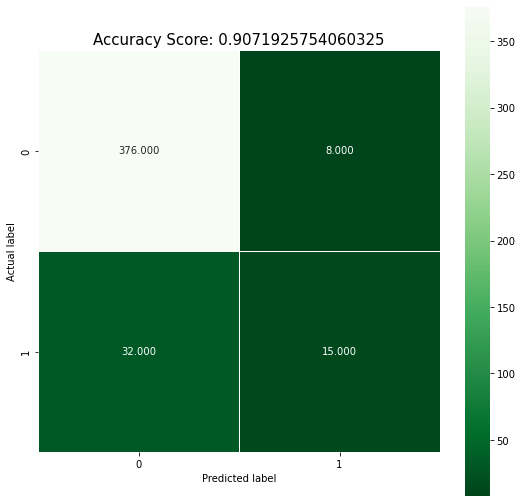

In [32]:
# Confusion Matrix 
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);

### 3) Feature selection

In [33]:
#checking how important is every feature-column name for the quality of wine 
# from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
# classifier = ExtraTreesClassifier()
classifier.fit(X_norm,y)
score = classifier.feature_importances_

In [34]:
score

array([0.06982922, 0.0950485 , 0.06162241, 0.05586727, 0.07338246,
       0.09649755, 0.06887569, 0.0357323 , 0.06229083, 0.14660459,
       0.23424917])

In [35]:
X_1 = X_norm.drop(['density'],axis=1)
# X_1 = X.drop(['density','pH'],axis=1)
X_1.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1435 non-null   float64
 1   volatile acidity      1435 non-null   float64
 2   citric acid           1435 non-null   float64
 3   residual sugar        1435 non-null   float64
 4   chlorides             1435 non-null   float64
 5   free sulfur dioxide   1435 non-null   float64
 6   total sulfur dioxide  1435 non-null   float64
 7   pH                    1435 non-null   float64
 8   sulphates             1435 non-null   float64
 9   alcohol               1435 non-null   float64
dtypes: float64(10)
memory usage: 112.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         14

In [36]:
X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=7)

In [37]:
model.fit(X_1_train, y_train)
y_pred = model.predict(X_1_test)

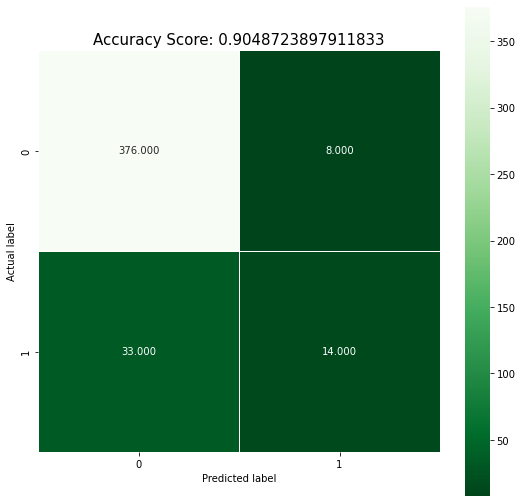

In [38]:
# Confusion Matrix 
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);

### 4) Hyperparameter Tuning

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [40]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=7,
                                 n_iter=100,
                                 scoring='accuracy',
                                 cv=cv,
                                 verbose=1,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPredict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
    

In [41]:
# Create regularization penalty space
penalty = ['l1', 'l2','none']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [42]:
LR_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPredict(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best: 0.877485 using {'C': 4.723239962884023, 'penalty': 'l2'}


In [43]:
# see the classification results
accuracy_score(y_test,Prediction_LR)

0.8932714617169374

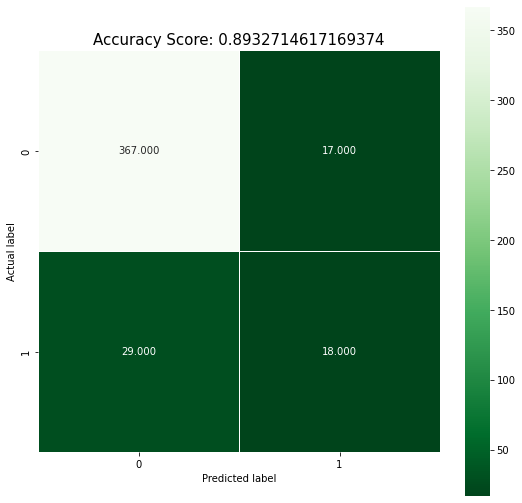

In [44]:
# Confusion Matrix 
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,Prediction_LR)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,Prediction_LR))
plt.title(all_sample_title, size = 15);